# mehmetfatihdata

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [2]:
education = pd.read_csv("education.csv",index_col=0)

# Q1:
Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. Dördüncü sınıftaki öğrencilerin sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!

In [3]:
s_4=(education['AVG_MATH_4_SCORE']+ education['AVG_READING_4_SCORE'])/2
s_8=(education['AVG_MATH_8_SCORE']+ education['AVG_READING_8_SCORE'])/2
education["SPECİAL_SCORE_AV"]=((education["GRADES_4_G"]*s_4)+(education ['GRADES_8_G']*s_8))/(education["GRADES_4_G"]+education ['GRADES_8_G'])

# Q2:
Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır?

In [4]:
col=['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE','FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE','GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G','AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

In [5]:
education_ex=education.drop(col,axis=1)

In [6]:
korelasyon=education_ex.corr()

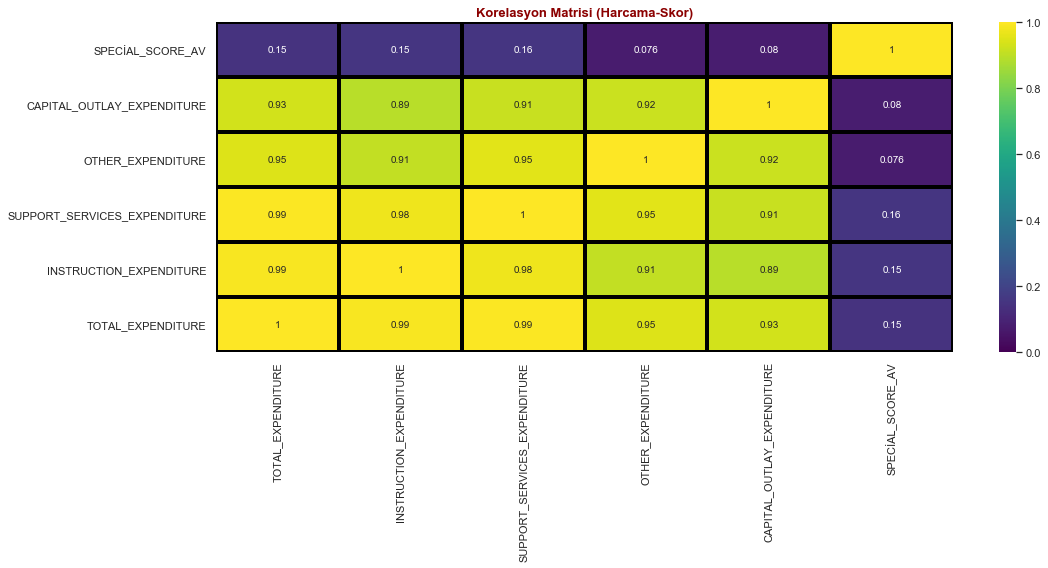

In [7]:
plt.figure(figsize=(16,8))

sns.heatmap(korelasyon,  annot=True, linewidths=3, linecolor="black",vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Harcama-Skor)", fontdict=baslik_font)
plt.ylim(0,len(korelasyon))
plt.tight_layout()
plt.show()

# Q3:
Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?


In [8]:
education_df=education.copy()

In [9]:
fill_list=['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']
years=education_df["YEAR"].unique()
for col in fill_list:
    for year in years:
        education_df[col]=education_df[col].fillna(education_df.groupby(education_df["YEAR"]==year)[col].transform("mean"))
education_df.head(2)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SPECİAL_SCORE_AV
0,1992_ALABAMA,ALABAMA,1992,905446.980392,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.307067,232.962962
1,1992_ALASKA,ALASKA,1992,905446.980392,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,79117.0,30847.0,112335.0,218.410116,266.360319,212.712256,258.859712,237.868580


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = education_df[["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
                  "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
education_df["PCA_EXPENDITURE_1"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.94405619]


More than 94% of the total variance is explained by the first principal component.

# Q4: 
Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?

In [11]:
education_df[["SPECİAL_SCORE_AV", "PCA_EXPENDITURE_1", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE",
              "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]].corr()

,SPECİAL_SCORE_AV,PCA_EXPENDITURE_1,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
SPECİAL_SCORE_AV,1.000000,0.120534,0.148056,0.154440,0.155339,0.077761,0.079734
PCA_EXPENDITURE_1,0.120534,1.000000,0.992115,0.971081,0.987925,0.969468,0.957790
TOTAL_EXPENDITURE,0.148056,0.992115,1.000000,0.991266,0.993060,0.940795,0.929965
INSTRUCTION_EXPENDITURE,0.154440,0.971081,0.991266,1.000000,0.976332,0.903720,0.892961
SUPPORT_SERVICES_EXPENDITURE,0.155339,0.987925,0.993060,0.976332,1.000000,0.947607,0.914531
OTHER_EXPENDITURE,0.077761,0.969468,0.940795,0.903720,0.947607,1.000000,0.916393
CAPITAL_OUTLAY_EXPENDITURE,0.079734,0.957790,0.929965,0.892961,0.914531,0.916393,1.000000


The correlation of the first principal component is less than the instruction expenditure and the support service expenditure variables.

# Q5: 
Modeliniz için en uygun değişkenleri seçmeniz gerektiğinde, harcama kalemlerinin yerine ilk temel değişkenleri tercih eder miydiniz? Neden?

Support Services expenditure variable is more correlated with the overall score than the first principal component. Hence using Support Services expenditure makes more sense. PCA works best when the correlation between the variables are less than and equal to 0.8. In our case, all of the expenditure variables are highly correlated with each other. This may result in instable principal component estimations.

BİTTİ.